# AD&D Churn Analysis And Modeling

To:&nbsp;&nbsp;&nbsp;&nbsp; [Magnimind](https://magnimindacademy.com/)

From: Matt Curcio, matt.curcio.us@gmail.com

Date: 2022-12-27

Re:&nbsp;&nbsp;&nbsp; Churn Analysis from 10/5/2022 to 11/5/2022

## Correlations for Continuous and Categorical Variables

- Remove columns: `T_D_Min, T_E_Min, T_N_Min, T_I_Min`, due to high correlations

- No significant correlation between the categorical vars, 'Int_Plan', 'VM_Plan' was found.

### Introduction

Pearson's correlation coefficient is appropriate when:

- Variables are continuous

- Linear relationship between two variables
  
- No outliers, Pearson's correlation coefficient is sensitive to outliers

- No violation of normality assumptions

### Results of Phi Coefficient of Association

- **Since the Phi Coefficient = 0.009, we can say there is no correlation between making 'International calls' and churn or retention.**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

path = '../data/processed/'
filename = 'mcc_clean_churn.csv'

df = pd.read_csv(path+filename)

df.columns

Index(['Act_Len', 'Int_Plan', 'VM_Plan', 'Num_VM', 'T_D_Min', 'T_D_Calls',
       'T_D_Charge', 'T_E_Min', 'T_E_Calls', 'T_E_Charge', 'T_N_Min',
       'T_N_Calls', 'T_N_Charge', 'T_I_Min', 'T_I_Calls', 'T_I_Charge',
       'Num_Srv_Calls', 'Churned'],
      dtype='object')

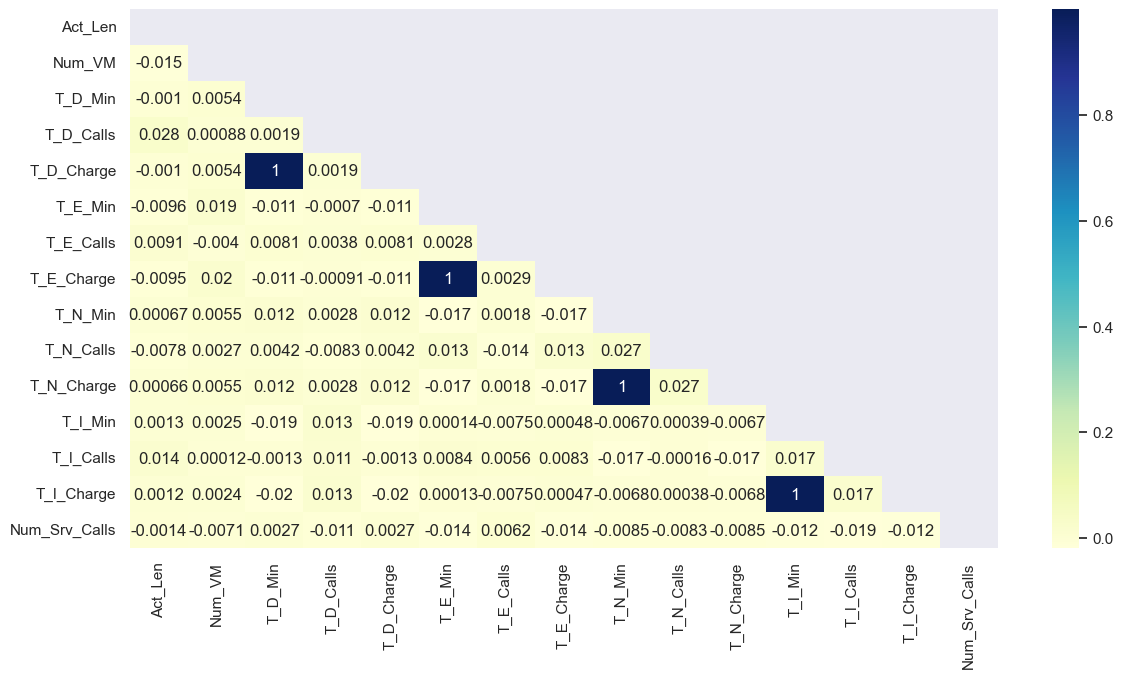

In [3]:
# Remove 'Int_Plan', 'VM_Plan', 'Churned' since these are categorical NOT continous.
df_mod = df.drop(columns=['Int_Plan', 'VM_Plan', 'Churned'], inplace=False)

# create triangular mask
mask = np.triu(np.ones_like(df_mod.corr()))
 
# plotting a triangle correlation heatmap
sns.set(rc={"figure.figsize":(14, 7)}) #width=3, #height=4
dataplot = sns.heatmap(df_mod.corr(), cmap="YlGnBu", annot=True, mask=mask)

# Save the plot as an png file
dataplot.figure.savefig("../assets/Churn_correlation.png", format="png")

plt.show()

**NOTE 1:**
We have four pairs of highly correlated variables, by checking with the Profiling EDA report we see there values are:

1. T_D_Charge Vs T_D_Min
   
2. T_E_Charge Vs T_E_Min
 
3. T_N_Charge Vs T_N_Min

4. T_I_Charge Vs T_I_Min

In [3]:
# Function to compare correlations between 2 independent, 1 dependent within matrix, df
def compare_corrs_2drop(Xi, Xj, Y_var, df=df):
    # Test Corr Coeff
    corr1 = np.corrcoef(df[Xi], df[Y_var])
    corr2 = np.corrcoef(df[Xj], df[Y_var])
    if corr1.any() >= corr2.any():
        print(f'\nDrop {Xj}\n') 
    else:
        print(f'Drop {Xi}')
    print(f'{Xi} => {corr1[0,1]}\n')
    print(f'{Xj} => {corr2[0,1]}')

In [4]:
# Compare T_D_Charge Vs T_D_Min, corr = 1
compare_corrs_2drop('T_D_Charge','T_D_Min','Churned', df=df)


Drop T_D_Min

T_D_Charge => 0.20769977695633648

T_D_Min => 0.20770519477848012


In [5]:
# Compare T_E_Charge Vs T_E_Min, corr = 1
compare_corrs_2drop('T_E_Charge','T_E_Min','Churned', df=df)


Drop T_E_Min

T_E_Charge => 0.08949460027582262

T_E_Min => 0.08928848603793108


In [6]:
# Compare N_Charge Vs T_N_Min, corr = 1
compare_corrs_2drop('T_N_Charge','T_N_Min','Churned', df=df)


Drop T_N_Min

T_N_Charge => 0.04567252950480982

T_N_Min => 0.04567672039250784


In [7]:
# Compare T_I_Charge Vs T_I_Min, corr = 1
compare_corrs_2drop('T_I_Charge','T_I_Min','Churned', df=df)


Drop T_I_Min

T_I_Charge => 0.06330311891737876

T_I_Min => 0.0632848878398785


**NOTE 2:**
- Remove columns: `T_D_Min, T_E_Min, T_N_Min, T_I_Min`

##  Testing Categorical Correlation Using Phi Coefficient of Association

The Phi Coefficient of Association ($\large \Phi$) is a measure of the degree of association (cooperative effect) between two binary variables.  

The Phi Coefficient test can be interpreted similarly to Pearson's correlation coefficient. Chiefly, does any change in conversion rate positively (or negatively) correlate with changing the two icons?

   - H0: There IS NO statistically significant relationship between the change in conversion rate and changing the cat and dog icons.
 
   - H1: There IS a statistically significant relationship between the two variables.

It is appropriate to use Phi in the following scenario:

1. To determine the relationship between two variables


2. The variables of interest are binary


3. There are only two variables


In [2]:
# KEEP Categorical vars = {Churned, Int_Plan, VM_Plan}

df_mod = df[['Int_Plan', 'VM_Plan']]

df_mod.head()

,Int_Plan,VM_Plan
0,0,1
1,0,1
2,0,0
3,1,0
4,1,0


## Find 2x2 contingency table for 'Int_Plan'& 'Churned'

In [4]:
table_a = df_mod[(df_mod['Int_Plan'] == 0) & (df_mod['VM_Plan'] == 0)].count()

table_b = df_mod[(df_mod['Int_Plan'] == 0) & (df_mod['VM_Plan'] == 1)].count()

table_c = df_mod[(df_mod['Int_Plan'] == 1) & (df_mod['VM_Plan'] == 0)].count()

table_d = df_mod[(df_mod['Int_Plan'] == 1) & (df_mod['VM_Plan'] == 1)].count()

# Fisher 2x2 Contingency Table

print('table_a =', table_a[0])
print('table_b =', table_b[0])
print('table_c =', table_c[0])
print('table_d =', table_d[0])

table_a = 3335
table_b = 1192
table_c = 342
table_d = 131


$$\large \Phi = \frac{a \cdot d - b \cdot c}{\sqrt{efgh}}$$ 

Where: 

|           Test | VM_Plan = 0 | VM_Plan = 0 | Mariginal Sums |
|---------------:|------------:|------------:|---------------:|
|   Int_Plan = 0 |    a = 3335 |    b = 1192 |       e = 4527 |
|   Int_Plan = 1 |     c = 342 |     d = 131 |        f = 473 |
| Mariginal Sums |    g = 3677 |    h = 1323 |   Total = 5000 |

In [6]:
import math 

numerator = (table_a[0] * table_d[0])-(table_b[0] * table_c[0])

denominator = ((4527)*(473)*(3677)*(1323))**(0.5)

print('\nThe numerator of Phi =', numerator)
print('\nThe denominator of Phi =', math.floor(denominator))
print(f'\nPhi Coefficient = {numerator/denominator:0.3f}')


The numerator of Phi = 29221

The denominator of Phi = 3227472

Phi Coefficient = 0.009


$$\large \Phi = \frac{29,221}{3,227,472} = 0.009$$

The Phi Coefficient test is interpreted similarly to Pearson's correlation coefficient

The Phi Coefficient takes on values between -1 and 1 where:
   - -1 indicates a perfectly negative relationship between the two variables.
   - 0 indicates no association between the two variables.
   - 1 indicates a perfectly positive relationship between the two variables.

### Results of Phi Coefficient of Association

- **Since the Phi Coefficient = 0.009, we can say there is no correlation between making 'International calls' and churn or retention.**